In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [0]:
train = pd.read_csv('/content/drive/My Drive/titanic_train.csv', index_col= 'PassengerId')
test_data = pd.read_csv('/content/drive/My Drive/titanic_test.csv', index_col= 'PassengerId')

In [0]:
train.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Giles, Mr. Frederick Edward",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
missing_col = [col for col in train.columns if train[col].isnull().any()]
missing_col

['Age', 'Cabin', 'Embarked']

In [0]:
train['Age'] = train['Age'].fillna(train['Age'].mean()).astype(int)
train.describe(include = 'all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Kvillner, Mr. Johan Henrik Johannesson",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.544332,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,13.013778,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,29.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# **Visualizing the dataset**

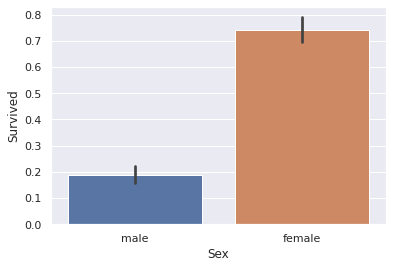

In [0]:
sns.barplot(x =train['Sex'], y = train['Survived'])

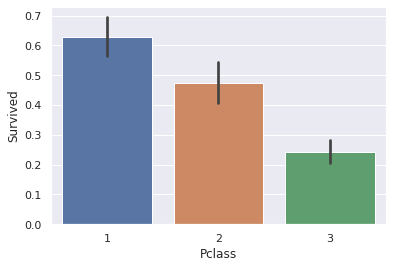

In [0]:
sns.barplot(x = train['Pclass'], y = train['Survived'])

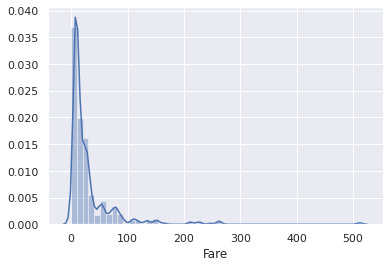

In [0]:
sns.distplot(train['Fare'])

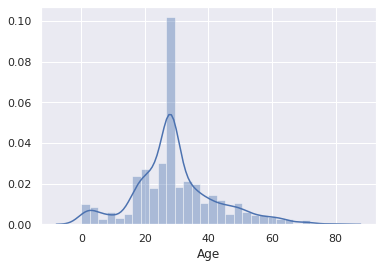

In [0]:
sns.distplot(train['Age'])

# **Removing outliers from the Fare column**

In [0]:
q = train['Fare'].quantile(0.93)
cleaned_train = train[train['Fare'] < q]
cleaned_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,0.355072,2.408213,29.338164,0.508454,0.352657,21.586764
std,0.478825,0.782227,12.967792,1.121916,0.787619,19.541247
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.550000
max,1.000000,3.000000,80.000000,8.000000,6.000000,86.500000


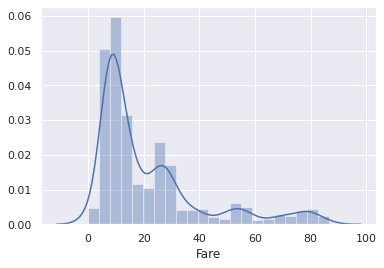

In [0]:
sns.distplot(cleaned_train['Fare'])

In [0]:
y = cleaned_train.Survived
cleaned_train.drop(['Survived'], axis = 1, inplace = True)
train_x, valid_x, train_y, valid_y = train_test_split(cleaned_train, y, train_size = 0.8, test_size = 0.2, random_state = 0)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_x.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
valid_x.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
train_x['Embarked'] = train_x['Embarked'].fillna(train_x['Embarked'].mode())
valid_x['Embarked'] = valid_x['Embarked'].fillna(valid_x['Embarked'].mode())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
train_x['Sex'] = train_x['Sex'].map({'female': 1, 'male': 0})
valid_x['Sex'] = valid_x['Sex'].map({'female': 1, 'male': 0})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
new_train = pd.get_dummies(train_x, drop_first= True)
new_valid = pd.get_dummies(valid_x, drop_first= True)
new_valid

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
677,3,0,24,0,0,8.0500,0,1
107,3,1,21,0,0,7.6500,0,1
9,3,1,27,0,2,11.1333,0,1
268,3,0,25,1,0,7.7750,0,1
675,2,0,29,0,0,0.0000,0,1
...,...,...,...,...,...,...,...,...
261,3,0,29,0,0,7.7500,1,0
460,3,0,29,0,0,7.7500,1,0
810,1,1,33,1,0,53.1000,0,1


In [0]:
new_train.shape

(662, 8)

In [0]:
model_3 = KNeighborsClassifier(n_neighbors = 3)
model_3.fit(new_train, train_y)
preds_3 = model_3.predict(new_valid)

In [0]:
metrics.accuracy_score(valid_y, preds_3)

0.6686746987951807

In [0]:
model_2 = LogisticRegression(max_iter = 10000)
model_2.fit(new_train, train_y)
preds_2 = model_2.predict(new_valid)

In [0]:
metrics.accuracy_score(valid_y, preds_2)

0.8132530120481928

In [0]:
model_1 = RandomForestClassifier(n_estimators = 100, random_state = 0)
model_1.fit(new_train, train_y)
preds = model_1.predict(new_valid)

In [0]:
metrics.accuracy_score(valid_y, preds)

0.7710843373493976

In [0]:
test_data.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,"Loring, Mr. Joseph Holland",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [0]:
missing_test = [col for col in test_data.columns if test_data[col].isnull().any()]
missing_test

['Age', 'Fare', 'Cabin']

In [0]:
test_data.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [0]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean()).astype(int)
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [0]:
test_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [0]:
test_data['Sex'] = test_data['Sex'].replace({'female': 1, 'male': 0})

In [0]:
new_test = pd.get_dummies(test_data, drop_first= True)
new_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
892,3,0,34,0,0,7.8292,1,0
893,3,1,47,1,0,7.0000,0,1
894,2,0,62,0,0,9.6875,1,0
895,3,0,27,0,0,8.6625,0,1
896,3,1,22,1,1,12.2875,0,1
...,...,...,...,...,...,...,...,...
1305,3,0,30,0,0,8.0500,0,1
1306,1,1,39,0,0,108.9000,0,0
1307,3,0,38,0,0,7.2500,0,1


In [0]:
test_preds = model_2.predict(new_test)

In [0]:
output = pd.DataFrame({'PassengerId': test_data.index, 'Survived': test_preds})
output.to_csv('The titanic 16', index=False)

In [0]:
pd.read_csv('The titanic 16')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
